<h3>Install Library & Imports</h3>

In [1]:
# Install the missing library for the creative chart
!pip install wordcloud

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud

In [3]:
# Set visual style
sns.set(style="whitegrid")
print("Libraries installed and imported successfully!")

Libraries installed and imported successfully!


<h3>Load Data</h3>

In [4]:
# Load the datasets
# Make sure these match your uploaded filenames exactly
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

print("Files loaded.")
print(f"Movies shape: {movies.shape}")
print(f"Credits shape: {credits.shape}")

Files loaded.
Movies shape: (4803, 20)
Credits shape: (4803, 4)


<h3>Merging & Cleaning</h3>

In [5]:
# 1. MERGE: Join the two datasets on 'id'
credits.rename(columns={'movie_id': 'id'}, inplace=True)
df = movies.merge(credits, on = 'id')

In [6]:
# 2. CLEANING: Remove rows with missing dates or zero runtime
df.dropna(subset=['release_date', 'runtime'], inplace=True)

In [7]:
# 3. CLEANING: Remove duplicates
df.drop_duplicates(subset='original_title', keep='first', inplace=True)

In [8]:
print("Data Merged and Cleaned.")
print(f"Final Data Shape: {df.shape}")

Data Merged and Cleaned.
Final Data Shape: (4798, 23)


<h3>Calculate Profit & Filter Data</h3>

In [16]:
# 1. Create 'Profit' Column
df['profit'] = df['revenue'] - df['budget']

In [17]:
# 2. Extract 'Year'
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

In [18]:
# 3. Filter for valid financial data (ignore $0 budget movies)
df_financial = df[(df['budget'] > 1000) & (df['revenue'] > 1000)].copy()

In [19]:
print("Feature Engineering Complete.")
df_financial[['original_title', 'budget', 'revenue', 'profit']].head(3)

Feature Engineering Complete.


original_title     budget     revenue      profit
0                                    Avatar  237000000  2787965087  2550965087
1  Pirates of the Caribbean: At World's End  300000000   961000000   661000000
2                                   Spectre  245000000   880674609   635674609

<h3>Visual 1 - Scatter Plot (Budget vs. Revenue)</h3>

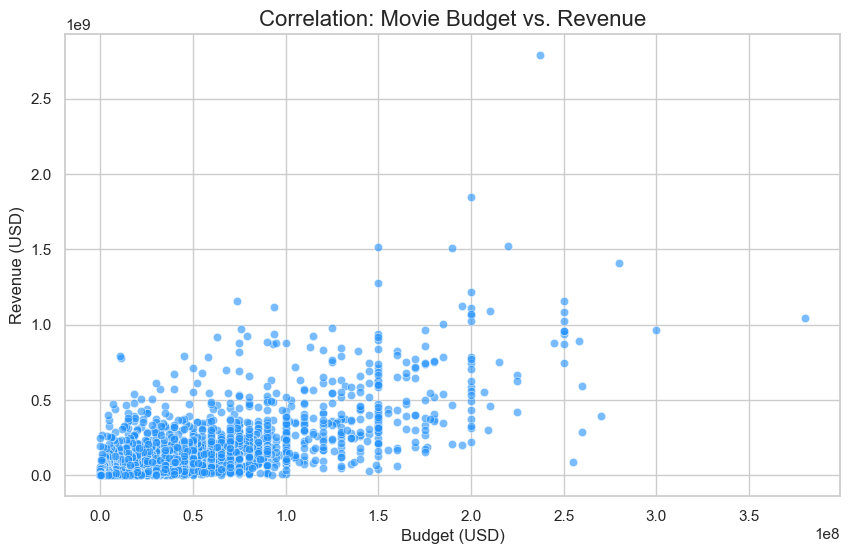

Correlation: 0.70


In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_financial, x='budget', y='revenue', alpha=0.6, color='dodgerblue')

plt.title('Correlation: Movie Budget vs. Revenue', fontsize=16)
plt.xlabel('Budget (USD)', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.show()

# Print Correlation Number
corr = df_financial['budget'].corr(df_financial['revenue'])
print(f"Correlation: {corr:.2f}")

<h3>Visual 2 - Trends Over Time</h3>

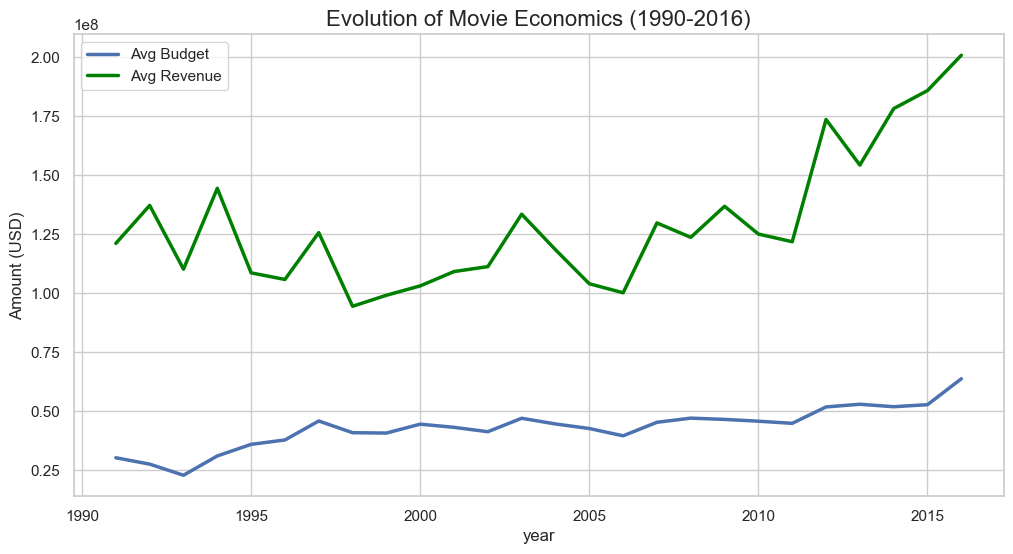

In [21]:
# Group by year
yearly_stats = df_financial.groupby('year')[['revenue', 'budget']].mean()

# Filter for modern era (post-1990)
yearly_stats = yearly_stats[yearly_stats.index > 1990]

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='budget', label='Avg Budget', linewidth=2.5)
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='revenue', label='Avg Revenue', linewidth=2.5, color='green')

plt.title('Evolution of Movie Economics (1990-2016)', fontsize=16)
plt.ylabel('Amount (USD)')
plt.show()

<h3>Visual 3 - Most Profitable Genres</h3>

C:\Users\fathensem\AppData\Local\Temp\ipykernel_32204\508224093.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_profit.values, y=genre_profit.index, palette='viridis')


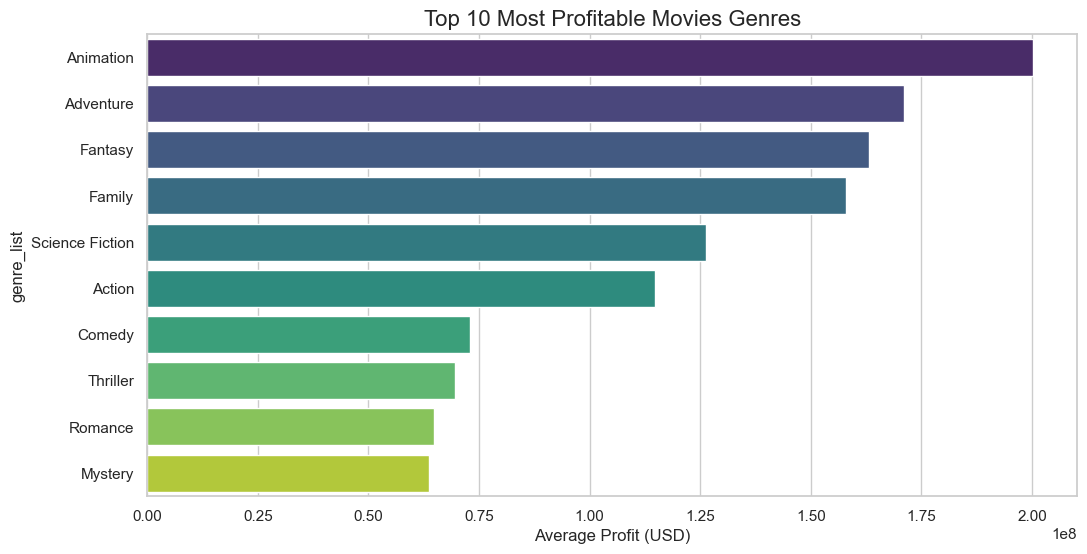

In [22]:
# Function to parse JSON columns
def get_genre_names(text):
    try:
        genres = json.loads(text)
        return [g['name'] for g in genres]
    except:
        return []

# Apply function
df_financial['genre_list'] = df_financial['genres'].apply(get_genre_names)

# Explode list to separate rows
df_exploded = df_financial.explode('genre_list')

# Calculate average profit by genre
genre_profit = df_exploded.groupby('genre_list')['profit'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=genre_profit.values, y=genre_profit.index, palette='viridis')
plt.title('Top 10 Most Profitable Movies Genres', fontsize=16)
plt.xlabel('Average Profit (USD)')
plt.show()

<h3>Visual 4 - Word Cloud</h3>

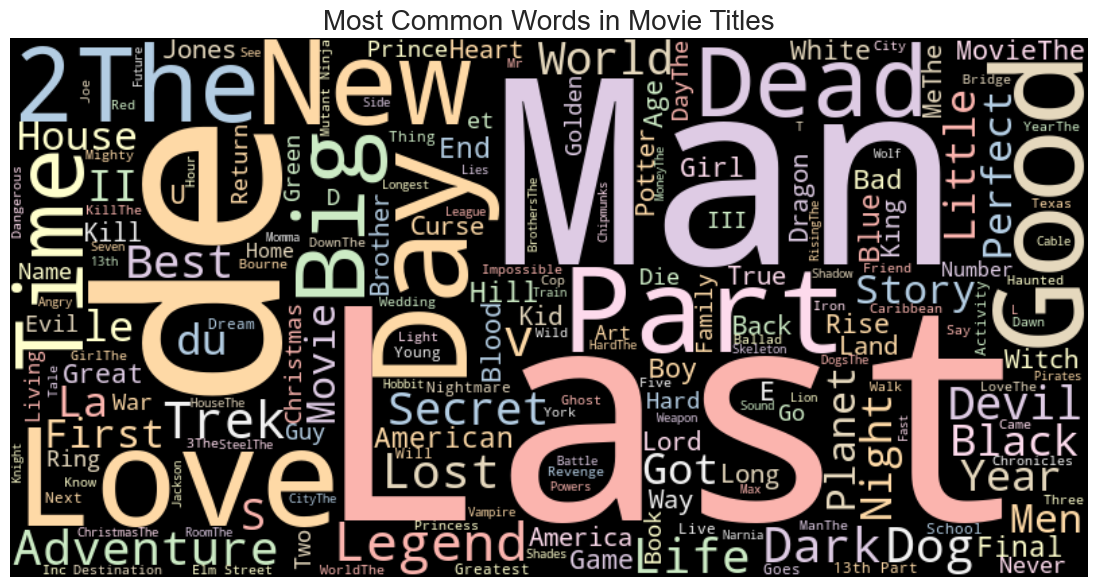

Analysis Complete! Ready for presentation


In [23]:
text = ''.join(df['original_title'].astype(str))

# Generate Word Cloud
# Note: colormap = 'Pastel1' is a valid Matplotlib colormap
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(text)

# Plot
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Movie Titles', fontsize=20)
plt.show()

print("Analysis Complete! Ready for presentation")